In [1]:
import kagglehub
import glob
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Use glob to list files in the downloaded path
files = glob.glob(os.path.join(path, '*'))  # Get all files in the directory

# Print the list of files
print("Files in the downloaded dataset:")
for file in files:
    print(file)

100%|██████████| 25.7M/25.7M [00:00<00:00, 95.7MB/s]

Extracting files...


Files in the downloaded dataset:
/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv


In [2]:
import sqlite3
import pandas as pd

# Load the Kaggle IMDB Dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv")

# Check the first few rows of the dataset
print(df.head())

# Connect to SQLite database
conn = sqlite3.connect('imdb_reviews.db')
cur = conn.cursor()

# Create table if it doesn't exist
cur.execute('''
CREATE TABLE IF NOT EXISTS imdb_reviews (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    review_text TEXT NOT NULL,
    sentiment TEXT NOT NULL
)
''')
conn.commit()

# Batch insert data
data_to_insert = df[['review', 'sentiment']].values.tolist()
cur.executemany('''
INSERT INTO imdb_reviews (review_text, sentiment)
VALUES (?, ?)
''', data_to_insert)
conn.commit()

# Verify the data
cur.execute('SELECT * FROM imdb_reviews LIMIT 5')
rows = cur.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(1, "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, a

In [8]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('imdb_reviews.db')
cur = conn.cursor()

# Query all rows or a subset (e.g., first 10 rows)
cur.execute('SELECT COUNT(review_text),COUNT(sentiment) FROM imdb_reviews')
rows = cur.fetchall()
print("No of rows in 'imdb_reviews' table:")
print(rows)
cur.execute('SELECT * FROM imdb_reviews LIMIT 10')
rows1 = cur.fetchall()

# Print the queried data
print("First 10 rows in the 'imdb_reviews' table:")
for row in rows1:
    print(row)

# Close the connection
conn.close()


No of rows in 'imdb_reviews' table:
[(50000, 50000)]
First 10 rows in the 'imdb_reviews' table:
(1, "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shad

In [9]:
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import string

# Step 1: Connect to the SQLite Database
conn = sqlite3.connect('imdb_reviews.db')  # Connect to the existing database
cur = conn.cursor()

# Step 2: Load the Data from the Database into a Pandas DataFrame
query = "SELECT * FROM imdb_reviews"
df = pd.read_sql_query(query, conn)

# Step 3: Data Cleaning Functions

# Function to remove HTML tags using BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to clean text (lowercase, remove HTML tags, and punctuation)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = remove_html_tags(text)  # Remove HTML tags
    text = remove_punctuation(text)  # Remove punctuation
    return text

# Apply the cleaning process to the 'review_text' column
df['cleaned_review'] = df['review_text'].apply(clean_text)

# Step 4: Remove duplicates (if any) based on 'cleaned_review'
df = df.drop_duplicates(subset=['cleaned_review'])

# Step 5: Preview the Cleaned Data
print("Preview of Cleaned Data:")
print(df[['id', 'cleaned_review', 'sentiment']].head())

# Step 6: Close the Database Connection
conn.close()


<ipython-input-9-42bf8180bbed>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


Preview of Cleaned Data:
   id                                     cleaned_review sentiment
0   1  one of the other reviewers has mentioned that ...  positive
1   2  a wonderful little production the filming tech...  positive
2   3  i thought this was a wonderful way to spend ti...  positive
3   4  basically theres a family where a little boy j...  negative
4   5  petter matteis love in the time of money is a ...  positive


In [10]:
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import string

# Step 1: Connect to the SQLite Database
conn = sqlite3.connect('imdb_reviews.db')
cur = conn.cursor()

# Step 2: Load Data from the Database
query = "SELECT * FROM imdb_reviews"
df = pd.read_sql_query(query, conn)

# Step 3: Data Cleaning Functions
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = remove_html_tags(text)  # Remove HTML tags
    text = remove_punctuation(text)  # Remove punctuation
    return text

# Step 4: Clean the 'review_text' Column
df['review_text'] = df['review_text'].apply(clean_text)

# Remove duplicates based on the cleaned 'review_text'
df = df.drop_duplicates(subset=['review_text'])

# Step 5: Update the Database with Cleaned Data
for index, row in df.iterrows():
    cur.execute('''
    UPDATE imdb_reviews
    SET review_text = ?
    WHERE id = ?
    ''', (row['review_text'], row['id']))
conn.commit()

# Step 6: Verify the Updated Data
cur.execute('SELECT id, review_text, sentiment FROM imdb_reviews LIMIT 5')
rows = cur.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


<ipython-input-10-3aef5a6a7318>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


(1, 'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pi

In [11]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('imdb_reviews.db')
cur = conn.cursor()

# Query all rows or a subset (e.g., first 10 rows)
cur.execute('SELECT COUNT(review_text),COUNT(sentiment) FROM imdb_reviews')
rows = cur.fetchall()
print("No of rows in 'imdb_reviews' table:")
print(rows)
cur.execute('SELECT * FROM imdb_reviews LIMIT 10')
rows1 = cur.fetchall()

# Print the queried data
print("First 10 rows in the 'imdb_reviews' table:")
for row in rows1:
    print(row)

# Close the connection
conn.close()


No of rows in 'imdb_reviews' table:
[(50000, 50000)]
First 10 rows in the 'imdb_reviews' table:
(1, 'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main ap

<ipython-input-13-7701360cc69f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


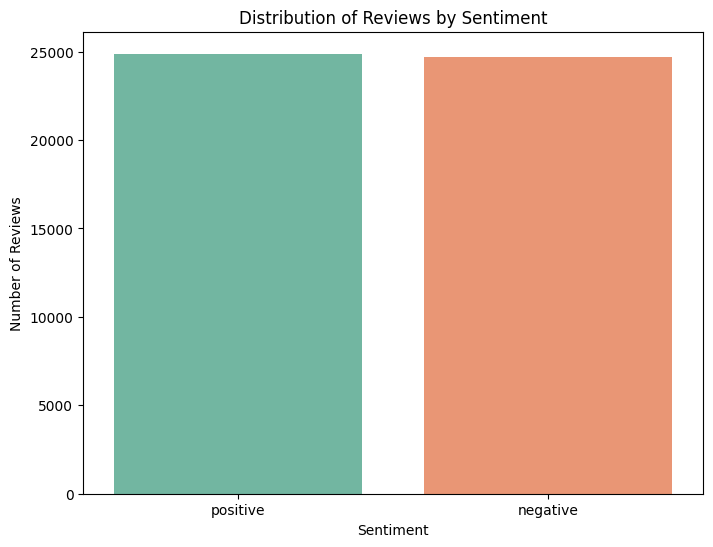

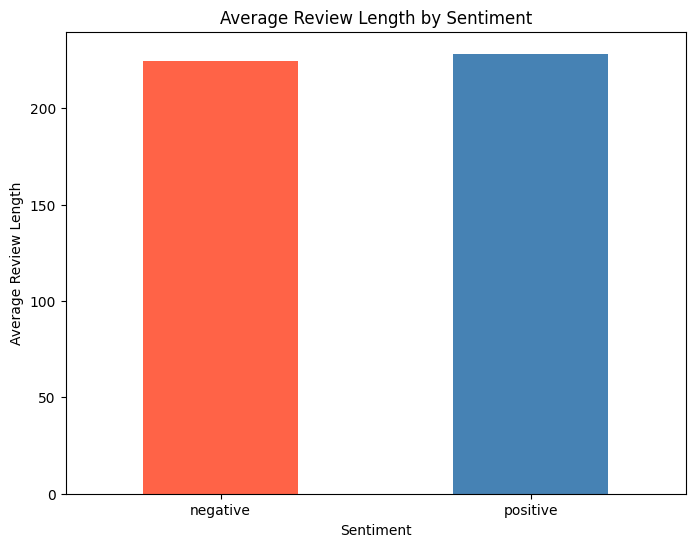

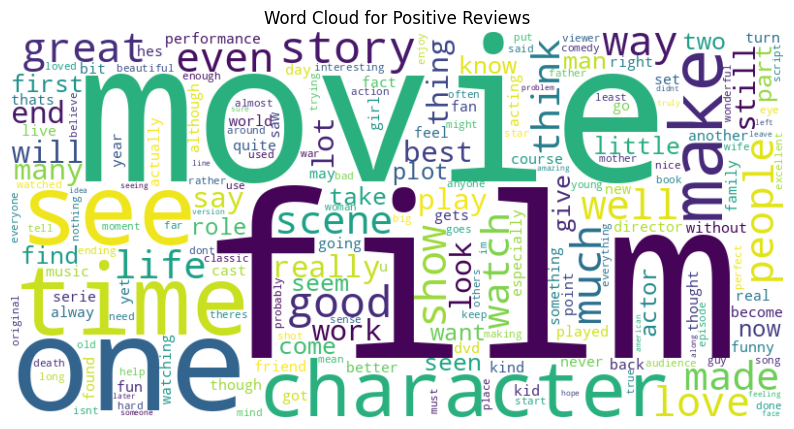

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count the number of reviews per sentiment
sentiment_counts = df['sentiment'].value_counts()

# Step 2: Average review length for positive vs negative
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()))  # Word count per review
avg_review_length = df.groupby('sentiment')['review_length'].mean()

# Step 3: Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Distribution of Reviews by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Step 4: Plot the average review length for each sentiment
plt.figure(figsize=(8, 6))
avg_review_length.plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title("Average Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Review Length")
plt.xticks(rotation=0)
plt.show()

# Optional: Word Cloud (for visualization of frequent words)
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis('off')
plt.show()
